In [1]:
from scrape import get_results
from scrape import get_data
from scrape import grab_years_played
from scrape import revised_run
from scrape import train_test
from scrape import read_adps

2022 RB Projections

In [2]:
X_train2022, X_test2022 = train_test('rb', num_years=5, year_for=2022)
xgbPPR_results = revised_run(X_train2022, X_test2022, 'rb', year_for='2022')
xgbPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 4.212074038753835
======= Fold 1 ========
Our accuracy on the validation set is 4.567673385936053
======= Fold 2 ========
Our accuracy on the validation set is 3.8484036864986804
======= Fold 3 ========
Our accuracy on the validation set is 4.009147672014254
======= Fold 4 ========
Our accuracy on the validation set is 4.923318001563629
Overall accuracy: 4.312123356953291
iteration 1: Dimensions = (74, 2)
iteration 2: Dimensions = (148, 2)
iteration 3: Dimensions = (222, 2)
iteration 4: Dimensions = (296, 2)
iteration 5: Dimensions = (370, 2)


,name,proj fpts,class,rank,last rank
0,austin-ekeler,18.121864,0,1,1
1,christian-mccaffrey,16.436525,0,2,2
2,josh-jacobs,16.330962,1,3,3
3,breece-hall,14.976460,1,4,42
4,joe-mixon,14.675516,1,5,10
5,dandre-swift,14.663664,1,6,21
6,saquon-barkley,14.640257,1,7,5
7,dameon-pierce,14.108160,1,8,27
8,kenneth-walker-rb,14.063318,1,9,18
9,rhamondre-stevenson,13.933881,1,10,7


======= Fold 0 ========
Our accuracy on the validation set is 3.2515393702976665
======= Fold 1 ========
Our accuracy on the validation set is 4.204246341245045
======= Fold 2 ========
Our accuracy on the validation set is 3.748832754508607
======= Fold 3 ========
Our accuracy on the validation set is 3.4904679257121862
======= Fold 4 ========
Our accuracy on the validation set is 4.203857788311566
Overall accuracy: 3.779788836015014
iteration 1: Dimensions = (74, 2)
iteration 2: Dimensions = (148, 2)
iteration 3: Dimensions = (222, 2)
iteration 4: Dimensions = (296, 2)
iteration 5: Dimensions = (370, 2)


,name,proj fpts,class,rank,last rank
0,austin-ekeler,23.2892,0,1,1
1,christian-mccaffrey,19.5232,0,2,2
2,nick-chubb,15.8800,1,3,6
3,derrick-henry,15.5584,1,4,4
4,josh-jacobs,15.5324,1,5,3
5,breece-hall,15.4338,1,6,42
6,saquon-barkley,14.5226,1,7,5
7,tony-pollard,14.3136,1,8,8
8,jonathan-taylor,13.7892,1,9,33
9,kenneth-walker-rb,13.3732,1,10,18


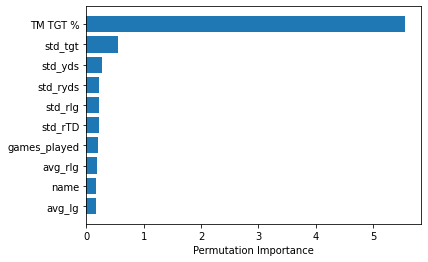

In [3]:
rfPPR_results = revised_run(X_train2022, X_test2022, 'rb', model_ = 'rf', pca=False)
rfPPR_results.head(50)

In [4]:
svrPPR_results = revised_run(X_train2022, X_test2022, 'rb', model_ = 'svr')
svrPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.8802567732147737
======= Fold 1 ========
Our accuracy on the validation set is 4.954981360029973
======= Fold 2 ========
Our accuracy on the validation set is 3.8187372010986302
======= Fold 3 ========
Our accuracy on the validation set is 4.377909737915555
======= Fold 4 ========
Our accuracy on the validation set is 4.837052751399807
Overall accuracy: 4.373787564731748
iteration 1: Dimensions = (74, 2)
iteration 2: Dimensions = (148, 2)
iteration 3: Dimensions = (222, 2)
iteration 4: Dimensions = (296, 2)
iteration 5: Dimensions = (370, 2)


,name,proj fpts,class,rank,last rank
0,austin-ekeler,16.085590,0,1,1
1,christian-mccaffrey,16.000751,0,2,2
2,josh-jacobs,15.216621,1,3,3
3,breece-hall,15.103925,1,4,42
4,derrick-henry,13.684439,1,5,4
5,kenneth-walker-rb,13.492028,1,6,18
6,nick-chubb,13.442389,1,7,6
7,joe-mixon,13.261427,1,8,10
8,saquon-barkley,13.199011,1,9,5
9,aaron-jones,13.102511,0,10,9


In [5]:
X_train2022, X_test2022 = train_test('rb', num_years=5, year_for=2022, scoring='HALF')
xgbHALF_results = revised_run(X_train2022, X_test2022, 'rb', year_for='2022', scoring='HALF')
xgbHALF_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.8203503716770553
======= Fold 1 ========
Our accuracy on the validation set is 3.8673840261134043
======= Fold 2 ========
Our accuracy on the validation set is 4.519986701272029
======= Fold 3 ========
Our accuracy on the validation set is 3.3430610585792144
======= Fold 4 ========
Our accuracy on the validation set is 3.164810217525931
Overall accuracy: 3.743118475033527
iteration 1: Dimensions = (69, 2)
iteration 2: Dimensions = (138, 2)
iteration 3: Dimensions = (207, 2)
iteration 4: Dimensions = (276, 2)
iteration 5: Dimensions = (345, 2)


,name,proj fpts,class,rank,last rank
0,austin-ekeler,18.230133,0,1,1
1,josh-jacobs,15.375040,0,2,3
2,christian-mccaffrey,14.302931,0,3,2
3,breece-hall,14.276070,4,4,42
4,nick-chubb,14.259763,1,5,5
5,saquon-barkley,13.753241,0,6,6
6,jonathan-taylor,13.597079,1,7,34
7,derrick-henry,13.052223,0,8,4
8,aaron-jones,12.869705,2,9,9
9,dandre-swift,12.811935,2,10,22


======= Fold 0 ========
Our accuracy on the validation set is 3.0467357445255563
======= Fold 1 ========
Our accuracy on the validation set is 3.317925947598892
======= Fold 2 ========
Our accuracy on the validation set is 4.588318053764365
======= Fold 3 ========
Our accuracy on the validation set is 3.3203528568135656
======= Fold 4 ========
Our accuracy on the validation set is 3.420064925370569
Overall accuracy: 3.5386795056145894
iteration 1: Dimensions = (69, 2)
iteration 2: Dimensions = (138, 2)
iteration 3: Dimensions = (207, 2)
iteration 4: Dimensions = (276, 2)
iteration 5: Dimensions = (345, 2)


,name,proj fpts,class,rank,last rank
0,austin-ekeler,20.7602,0,1,1
1,christian-mccaffrey,16.5254,0,2,2
2,josh-jacobs,15.8088,0,3,3
3,nick-chubb,14.9430,1,4,5
4,derrick-henry,14.4156,0,5,4
5,saquon-barkley,14.0754,0,6,6
6,jonathan-taylor,13.4462,1,7,34
7,tony-pollard,13.3664,0,8,7
8,breece-hall,12.2832,4,9,42
9,travis-etienne,11.7292,1,10,17


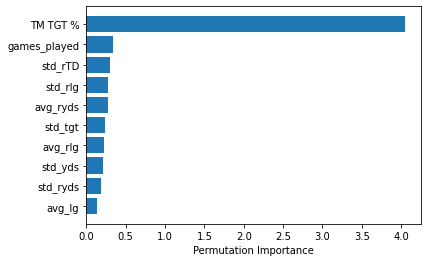

In [6]:
rfHALF_results = revised_run(X_train2022, X_test2022, 'rb', model_ = 'rf', pca=False, scoring='HALF')
rfHALF_results.head(50)

In [7]:
svrHALF_results = revised_run(X_train2022, X_test2022, 'rb', year_for='2022', model_='svr', scoring='HALF')
svrHALF_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.5339431043479723
======= Fold 1 ========
Our accuracy on the validation set is 3.6618245005489114
======= Fold 2 ========
Our accuracy on the validation set is 4.725079546477528
======= Fold 3 ========
Our accuracy on the validation set is 3.6354629908767424
======= Fold 4 ========
Our accuracy on the validation set is 3.8989832410620124
Overall accuracy: 3.8910586766626336
iteration 1: Dimensions = (69, 2)
iteration 2: Dimensions = (138, 2)
iteration 3: Dimensions = (207, 2)
iteration 4: Dimensions = (276, 2)
iteration 5: Dimensions = (345, 2)


,name,proj fpts,class,rank,last rank
0,austin-ekeler,15.733749,0,1,1
1,josh-jacobs,14.236174,0,2,3
2,nick-chubb,14.106034,1,3,5
3,christian-mccaffrey,14.026500,0,4,2
4,derrick-henry,13.612848,0,5,4
5,saquon-barkley,12.693173,0,6,6
6,tony-pollard,12.502555,0,7,7
7,breece-hall,12.439781,4,8,42
8,kenneth-walker-rb,12.271187,1,9,16
9,aaron-jones,12.084865,2,10,9


In [8]:
mean_results_PPR = xgbPPR_results.append([rfPPR_results, svrPPR_results], ignore_index = True)[['name', 'proj fpts']].groupby('name', as_index=False).mean().sort_values('proj fpts', ascending=False)
mean_results_PPR = mean_results_PPR.reset_index(drop=True)
mean_results_PPR['rank'] = mean_results_PPR.index + 1
mean_results_PPR.to_csv('projections/rb_PPR_2022_mean_projections.csv', index = False)
mean_results_PPR.head(50)

,name,proj fpts,rank
0,austin-ekeler,19.165551,1
1,christian-mccaffrey,17.320159,2
2,josh-jacobs,15.693327,3
3,breece-hall,15.171395,4
4,nick-chubb,14.360952,5
5,saquon-barkley,14.120623,6
6,derrick-henry,14.003277,7
7,kenneth-walker-rb,13.642849,8
8,tony-pollard,13.424983,9
9,joe-mixon,13.264514,10


In [9]:
mean_results_HALF = xgbHALF_results.append([rfHALF_results, svrHALF_results], ignore_index = True)[['name', 'proj fpts']].groupby('name', as_index=False).mean().sort_values('proj fpts', ascending=False)
mean_results_HALF = mean_results_HALF.reset_index(drop=True)
mean_results_HALF['rank'] = mean_results_HALF.index + 1
mean_results_HALF.to_csv('projections/rb_HALF_2022_mean_projections.csv', index = False)
mean_results_HALF.head(50)

,name,proj fpts,rank
0,austin-ekeler,18.241361,1
1,josh-jacobs,15.140004,2
2,christian-mccaffrey,14.951610,3
3,nick-chubb,14.436266,4
4,derrick-henry,13.693557,5
5,saquon-barkley,13.507271,6
6,breece-hall,12.999684,7
7,jonathan-taylor,12.969396,8
8,tony-pollard,12.395021,9
9,najee-harris-rb,11.982659,10
